In [9]:
import numpy as np
import torch
from model.CringeLDM import CringeBERTWrapper, CringeLDMWrapper
# Complete import for plt
import matplotlib.pyplot as plt
from PIL import Image

# Inference of UNET model
# Path: inference.py
# Compare this snippet from model/modules/UNetWithCrossAttention.py:

# Convert Conv2d output to RGB image
def convert_to_rgb(x):
    x = x.squeeze(0)
    x = x.permute(1, 2, 0)
    x = x.detach().numpy()
    x = (x - x.min()) / (x.max() - x.min())
    x = (x * 255).astype(np.uint8)
    return x

# Convert RGB image to Conv2d input
def convert_to_conv2d(x):
    x = x.astype(np.float32)
    x = x / 255
    x = (x - x.min()) / (x.max() - x.min())
    x = torch.from_numpy(x)
    x = x.permute(2, 0, 1)
    x = x.unsqueeze(0)
    return x

# Load bert
bertWrapper = CringeBERTWrapper()
bertWrapper.loadModel()

# Load the model
modelWrapper = CringeLDMWrapper(bert=bertWrapper, ldm=None)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.tr

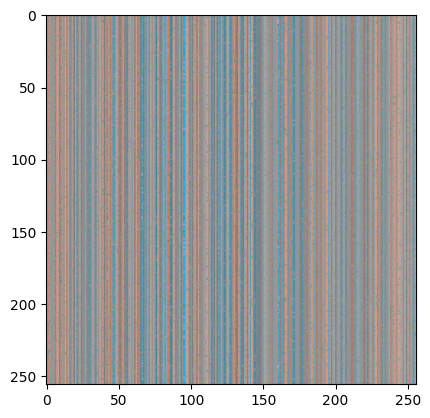

In [12]:
# Import an image from a file
img = Image.open("/mnt/e/Source/unsplash-lite-corpus-preprocess/db/img/xQSLtWJqJ14.png")
# Resize the image
img = img.resize((256, 256))
# Convert the image to numpy array
img = np.array(img)
# Convert the image to Conv2d input
img = convert_to_conv2d(img)

# Load the image
res = modelWrapper.inference(steps=2, query="I am a cat", img=img);

# Convert the image to RGB
res = convert_to_rgb(res)

# Show the image
plt.imshow(res)